In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hmeq-data/hmeq.csv


In [2]:
df = pd.read_csv("/kaggle/input/hmeq-data/hmeq.csv")
df_i = pd.read_csv("/kaggle/input/hmeq-data/hmeq.csv")

In [3]:
#######Read the data and get a glimpse of the data and Understand your data########

In [4]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
df.shape

(5960, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [7]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [8]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [9]:
##############Distribution of Variables#####################

In [10]:
df["BAD"].head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64

In [11]:
df["BAD"].value_counts()

BAD
0    4771
1    1189
Name: count, dtype: int64

<Axes: ylabel='BAD'>

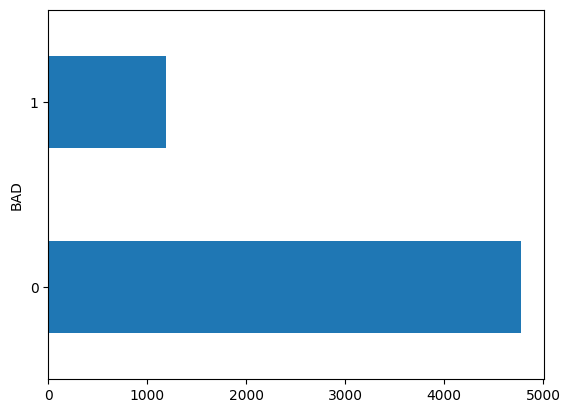

In [12]:
df["BAD"].value_counts().plot(kind="barh")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [14]:
df["REASON"].value_counts()

REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64

In [15]:
df["JOB"].value_counts()

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

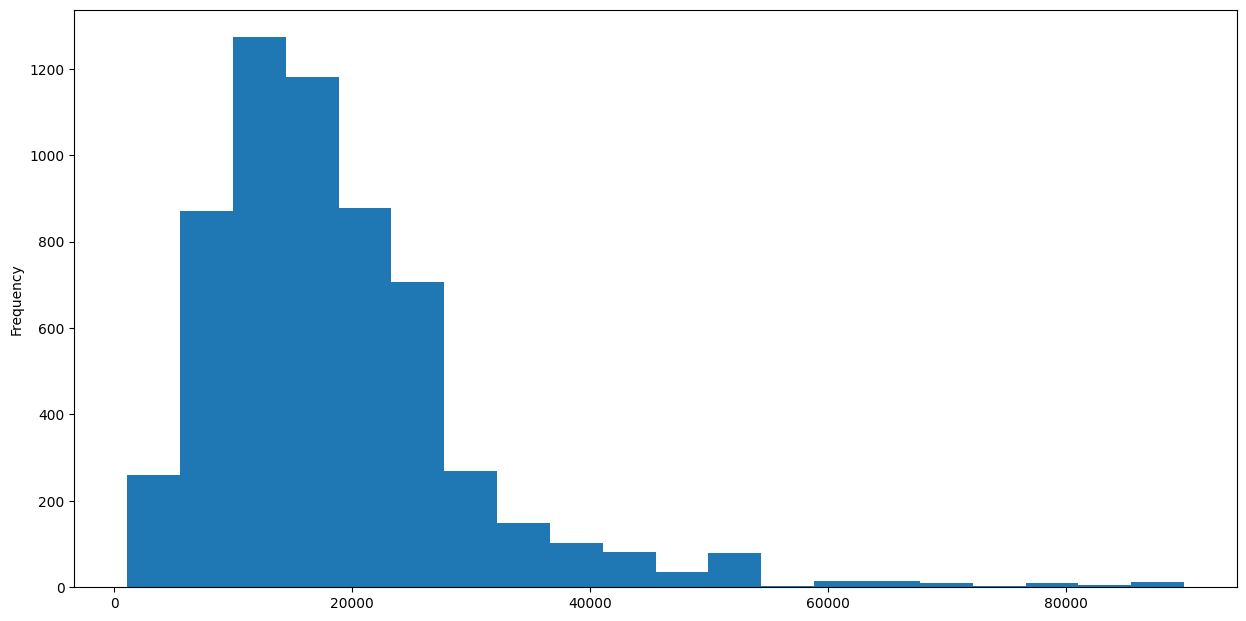

In [16]:
df["LOAN"].plot.hist(bins=20, figsize=(15, 7.5))

<Axes: ylabel='Frequency'>

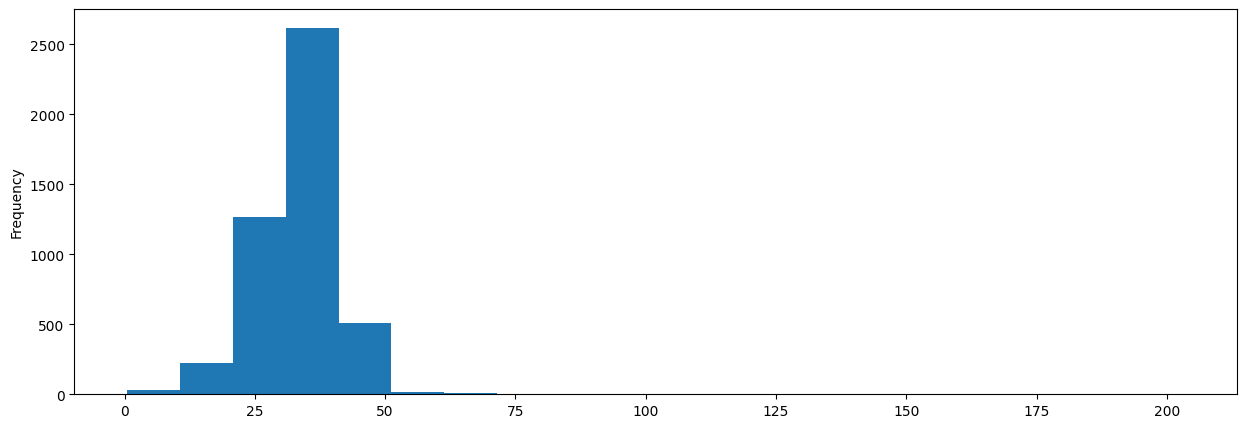

In [17]:
df["DEBTINC"].plot.hist(bins = 20,figsize=(15,5))

<Axes: ylabel='Frequency'>

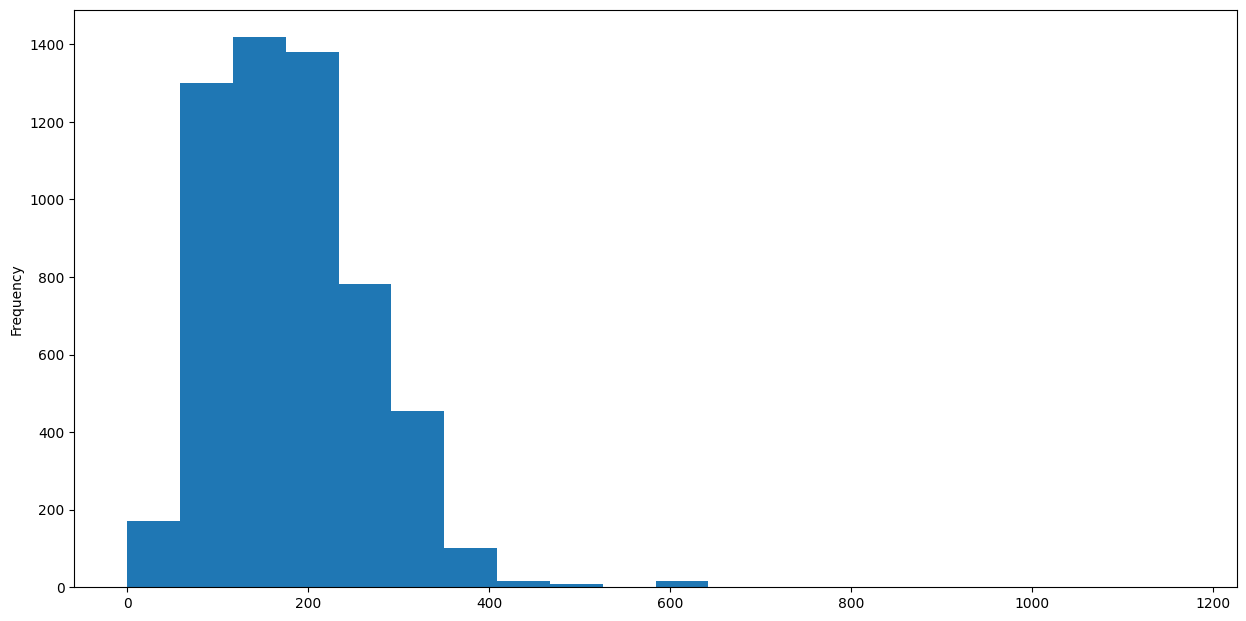

In [18]:
df["CLAGE"].plot.hist(bins = 20,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

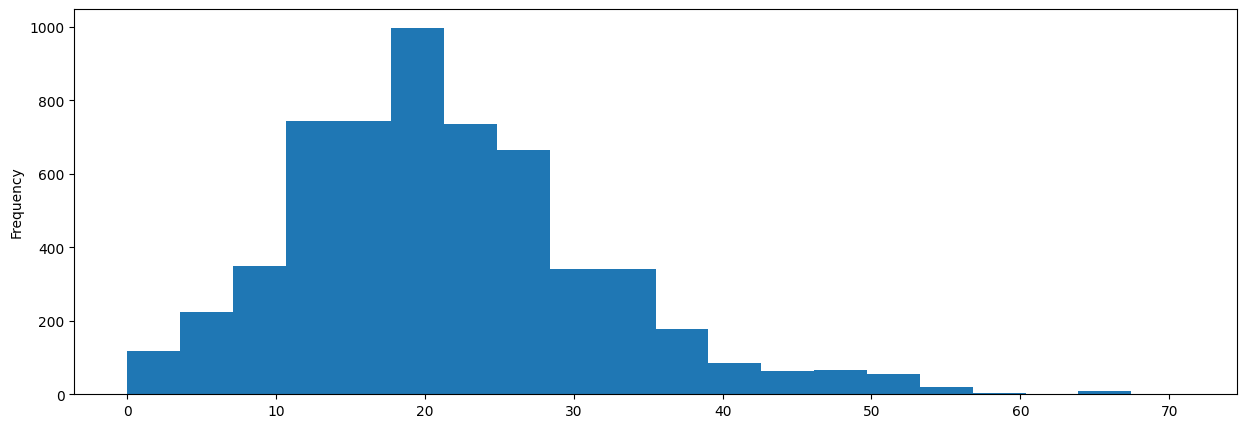

In [19]:
df["CLNO"].plot.hist(bins = 20,figsize=(15,5))

<Axes: ylabel='Frequency'>

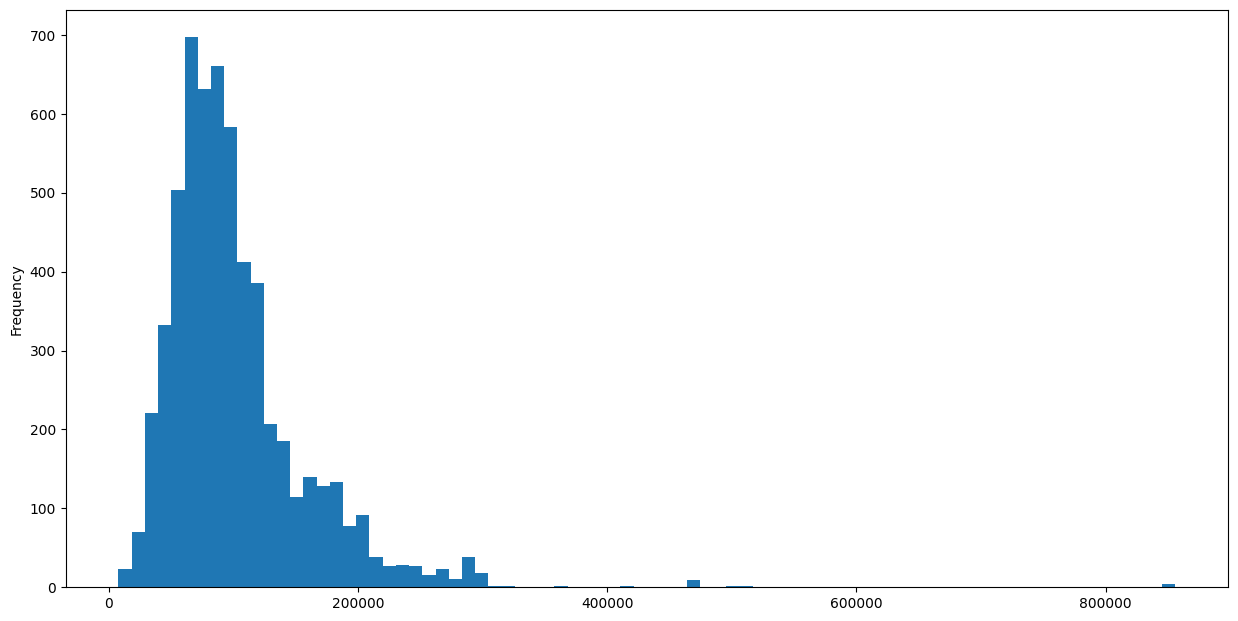

In [20]:
df["VALUE"].plot.hist(bins = 80, figsize=(15,7.5))

<Axes: ylabel='Frequency'>

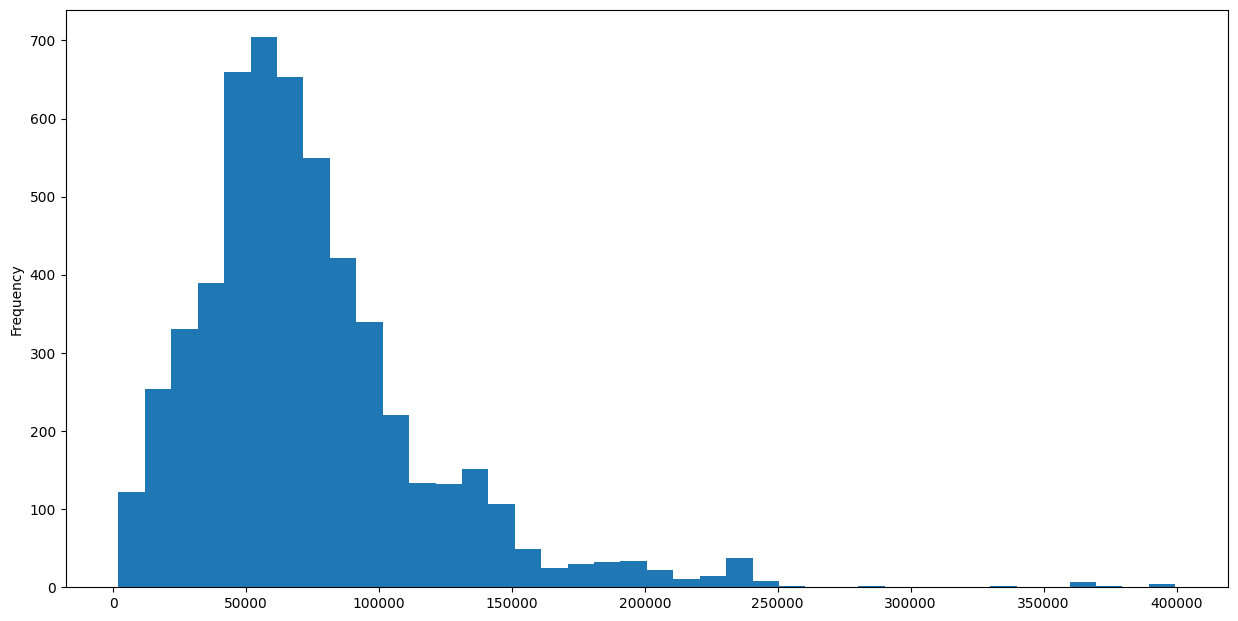

In [21]:
df["MORTDUE"].plot.hist(bins = 40,figsize=(15,7.5))

<Axes: ylabel='Frequency'>

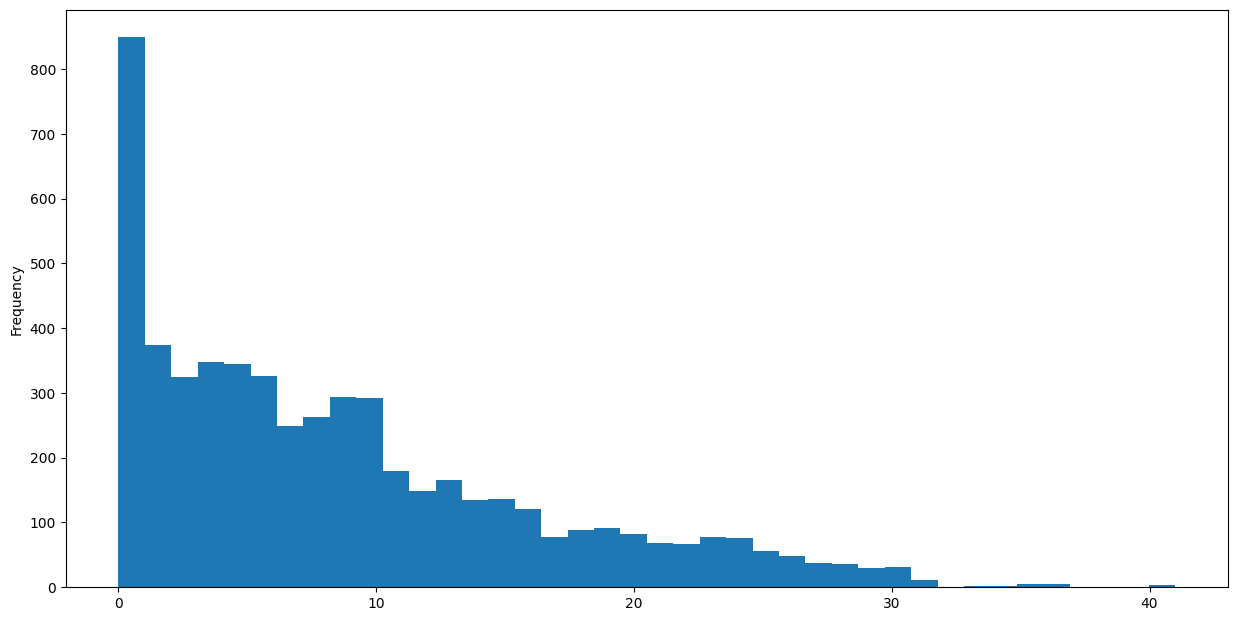

In [22]:
df["YOJ"].plot.hist(bins = 40,figsize=(15,7.5))

In [23]:
df["DEROG"].value_counts()

DEROG
0.0     4527
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: count, dtype: int64

In [24]:
df["NINQ"].value_counts()

NINQ
0.0     2531
1.0     1339
2.0      780
3.0      392
4.0      156
5.0       75
6.0       56
7.0       44
10.0      28
8.0       22
9.0       11
11.0      10
12.0       2
13.0       2
14.0       1
17.0       1
Name: count, dtype: int64

In [25]:
df["DEBTINC"].isnull().value_counts()

DEBTINC
False    4693
True     1267
Name: count, dtype: int64

In [26]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [27]:
df["REASON"].value_counts()

REASON
DebtCon    3928
HomeImp    1780
Name: count, dtype: int64

In [28]:
df["REASON"].fillna(value="DebtCon", inplace= True)

/tmp/ipykernel_36/193806867.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["REASON"].fillna(value="DebtCon", inplace= True)


In [29]:
df["REASON"].isnull().value_counts()

REASON
False    5960
Name: count, dtype: int64

In [30]:
df["JOB"].value_counts()

JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64

In [31]:
df.fillna({"JOB": "Other"}, inplace=True)

In [32]:
df["JOB"].value_counts()

JOB
Other      2667
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: count, dtype: int64

In [33]:
df["JOB"].isnull().value_counts()

JOB
False    5960
Name: count, dtype: int64

In [34]:
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [35]:
df.dtypes.loc["BAD"]

dtype('int64')

In [36]:
df["DEROG"].fillna(value=0,inplace=True)
df["DELINQ"].fillna(value=0,inplace=True)

/tmp/ipykernel_36/3249559507.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["DEROG"].fillna(value=0,inplace=True)
/tmp/ipykernel_36/3249559507.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [37]:
df.isnull().value_counts()

BAD    LOAN   MORTDUE  VALUE  REASON  JOB    YOJ    DEROG  DELINQ  CLAGE  NINQ   CLNO   DEBTINC
False  False  False    False  False   False  False  False  False   False  False  False  False      3751
                                                                                        True        971
                                             True   False  False   False  False  False  False       191
              True     False  False   False  False  False  False   False  False  False  False       190
              False    False  False   False  False  False  False   False  True   False  False       165
                                                                   True   True   True   False        62
                       True   False   False  False  False  False   False  False  False  True         59
              True     False  False   False  True   False  False   False  False  False  False        59
                                             False  False  False   False

In [38]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON        0
JOB           0
YOJ         515
DEROG         0
DELINQ        0
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [39]:
df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').apply(lambda x: x.fillna(x.mean()))

In [40]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [41]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [45]:
X = df.drop(['BAD', 'REASON', 'JOB'], axis=1)

In [46]:
y = df['BAD']

In [47]:
X_basic_train, X_basic_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [48]:
logreg_basic = LogisticRegression()

In [49]:
logreg_basic.fit(X_basic_train, y_train)

LogisticRegression()

In [50]:
y_pre = logreg_basic.predict(X_basic_test)

In [51]:
a1 = accuracy_score(y_test, y_pre)
r1 = recall_score(y_test, y_pre, average="macro")
p1 = precision_score(y_test, y_pre, average="macro")
f1 = f1_score(y_test, y_pre, average="macro")

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
print("Accuracy:", a1)
print("Recall:", r1)
print("Precision:", p1)
print("F1:", f1)


Accuracy: 0.7935943060498221
Recall: 0.5
Precision: 0.39679715302491103
F1: 0.44246031746031744


In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cnf_matrix = confusion_matrix(y_test, y_pre)

In [56]:
print(cnf_matrix)

[[1561    0]
 [ 406    0]]


In [57]:
import itertools

Confusion matrix, without normalization
[[1561    0]
 [ 406    0]]


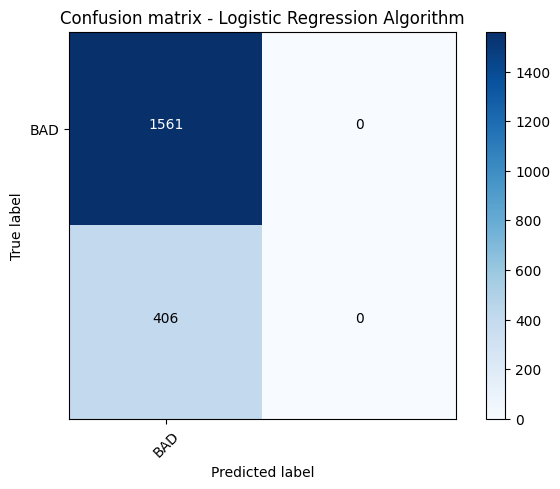

In [58]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
dectree_basic = DecisionTreeClassifier(max_depth=100, random_state=0)

In [61]:
dectree_basic.fit(X_basic_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=0)

In [62]:
y_pre = dectree_basic.predict(X_basic_test)

In [63]:
a2 = accuracy_score(y_test, y_pre)
r2 = recall_score(y_test, y_pre, average="macro")
p2 = precision_score(y_test, y_pre, average="macro")
f2 = f1_score(y_test, y_pre, average="macro")

In [64]:
print("Accuracy:", a2)
print("Recall:", r2)
print("Precision:", p2)
print("F1:", f2)

Accuracy: 0.8678190137264871
Recall: 0.7773034526938964
Precision: 0.8037846574016456
F1: 0.789251852730965


In [65]:
cnf_matrix = confusion_matrix(y_test, y_pre)

In [66]:
print(cnf_matrix)

[[1454  107]
 [ 153  253]]


Confusion matrix, without normalization
[[1454  107]
 [ 153  253]]


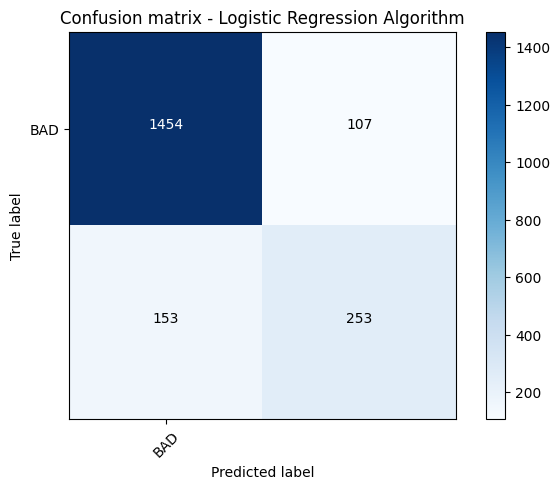

In [67]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm')

plt.show()

Feature Transformation

In [68]:
df.loc[df["CLAGE"]>=600, "CLAGE"] = 600

In [69]:
df.loc[df["VALUE"]>=400000,"VALUE"] = 400000
df.loc[df["MORTDUE"]>=300000,"MORTDUE"] = 300000
df.loc[df["DEBTINC"]>=100,"DEBTINC"] = 100

In [70]:
df["B_DEROG"] = (df["DEROG"]>=1)*1
df["B_DELINQ"] = (df["DELINQ"]>=1)*1

In [71]:
df["REASON_1"] = (df["REASON"] == "HomeImp")*1
df["REASON_1"] = (df["REASON"] != "HomeImp")*1

In [72]:
df["JOB_1"] = (df["JOB"] == "Other")*1
df["JOB_2"] = (df["JOB"]=="Office")*1
df["JOB_3"] = (df["JOB"]=="Sales")*1
df["JOB_4"] = (df["JOB"]=="Mgr")*1
df["JOB_5"] = (df["JOB"]=="ProfExe")*1
df["JOB_6"] = (df["JOB"]=="Self")*1


In [73]:
df.drop(["JOB", "REASON"], axis=1, inplace=True)

In [74]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,B_DEROG,B_DELINQ,REASON_1,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
0,1,1100,25860.0000,39025.000000,10.500000,0.0,0.0,94.366667,1.000000,9.000000,33.779915,0,0,0,1,0,0,0,0,0
1,1,1300,70053.0000,68400.000000,7.000000,0.0,2.0,121.833333,0.000000,14.000000,33.779915,0,1,0,1,0,0,0,0,0
2,1,1500,13500.0000,16700.000000,4.000000,0.0,0.0,149.466667,1.000000,10.000000,33.779915,0,0,0,1,0,0,0,0,0
3,1,1500,73760.8172,101776.048741,8.922268,0.0,0.0,179.766275,1.186055,21.296096,33.779915,0,0,1,1,0,0,0,0,0
4,0,1700,97800.0000,112000.000000,3.000000,0.0,0.0,93.333333,0.000000,14.000000,33.779915,0,0,0,0,1,0,0,0,0


In [75]:
df["YOJ"] = df["YOJ"].apply(lambda t : np.log(t+1))

In [76]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,B_DEROG,B_DELINQ,REASON_1,JOB_1,JOB_2,JOB_3,JOB_4,JOB_5,JOB_6
0,1,1100,25860.0000,39025.000000,2.442347,0.0,0.0,94.366667,1.000000,9.000000,33.779915,0,0,0,1,0,0,0,0,0
1,1,1300,70053.0000,68400.000000,2.079442,0.0,2.0,121.833333,0.000000,14.000000,33.779915,0,1,0,1,0,0,0,0,0
2,1,1500,13500.0000,16700.000000,1.609438,0.0,0.0,149.466667,1.000000,10.000000,33.779915,0,0,0,1,0,0,0,0,0
3,1,1500,73760.8172,101776.048741,2.294782,0.0,0.0,179.766275,1.186055,21.296096,33.779915,0,0,1,1,0,0,0,0,0
4,0,1700,97800.0000,112000.000000,1.386294,0.0,0.0,93.333333,0.000000,14.000000,33.779915,0,0,0,0,1,0,0,0,0


<Axes: ylabel='Frequency'>

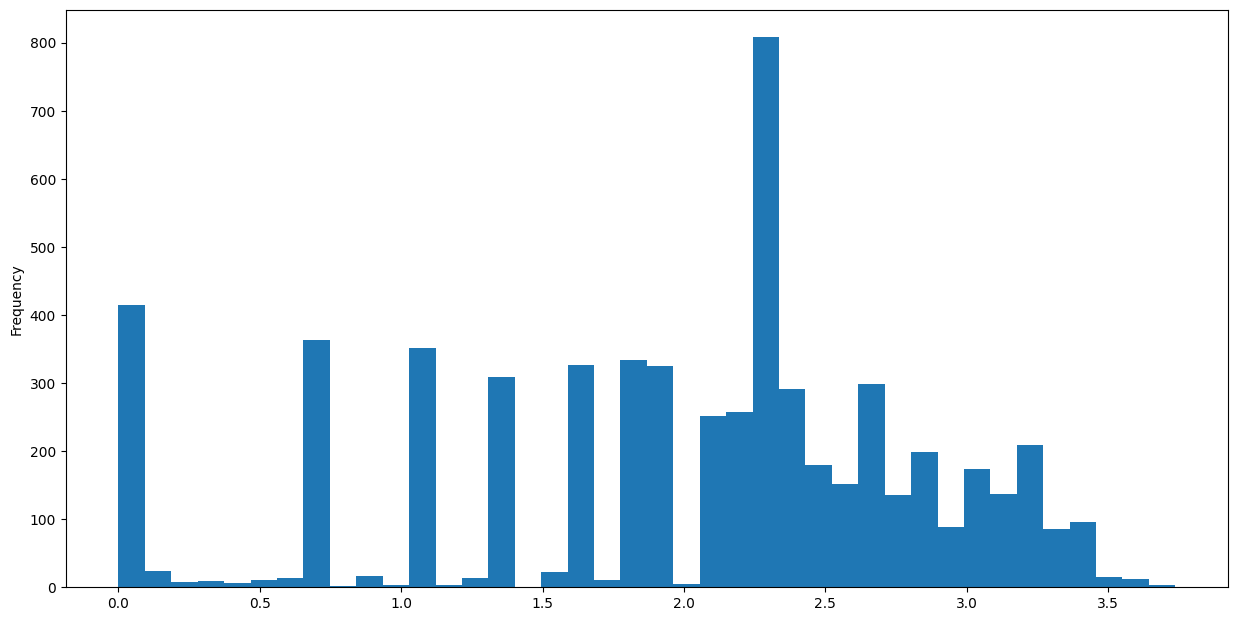

In [77]:
df["YOJ"].plot.hist(bins = 40,figsize=(15,7.5))

Feature Selection

In [78]:
print(df.corr(method='pearson'))

               BAD      LOAN   MORTDUE     VALUE       YOJ     DEROG  \
BAD       1.000000 -0.075099 -0.049420 -0.043711 -0.053066  0.269921   
LOAN     -0.075099  1.000000  0.214803  0.338749  0.102458  0.006996   
MORTDUE  -0.049420  0.214803  1.000000  0.816001 -0.052771 -0.046526   
VALUE    -0.043711  0.338749  0.816001  1.000000  0.023878 -0.041263   
YOJ      -0.053066  0.102458 -0.052771  0.023878  1.000000 -0.050552   
DEROG     0.269921  0.006996 -0.046526 -0.041263 -0.050552  1.000000   
DELINQ    0.346503 -0.028869  0.002095 -0.000578  0.023185  0.171286   
CLAGE    -0.173412  0.088875  0.132928  0.178638  0.145111 -0.081231   
NINQ      0.168851  0.043160  0.026853 -0.004635 -0.052621  0.146700   
CLNO     -0.004067  0.071804  0.314779  0.283654  0.042928  0.050727   
DEBTINC   0.122494  0.074101  0.132220  0.120090 -0.049355  0.011852   
B_DEROG   0.261216  0.009079 -0.041471 -0.040482 -0.058295  0.755021   
B_DELINQ  0.308153 -0.030646 -0.014568 -0.034988  0.023075  0.17

In [79]:
print(df.corr(method='pearson')["BAD"].sort_values(ascending=False))

BAD         1.000000
DELINQ      0.346503
B_DELINQ    0.308153
DEROG       0.269921
B_DEROG     0.261216
NINQ        0.168851
DEBTINC     0.122494
JOB_3       0.050934
JOB_6       0.046245
JOB_1       0.037949
JOB_4       0.032583
CLNO       -0.004067
REASON_1   -0.037517
JOB_5      -0.043561
VALUE      -0.043711
MORTDUE    -0.049420
YOJ        -0.053066
JOB_2      -0.073613
LOAN       -0.075099
CLAGE      -0.173412
Name: BAD, dtype: float64


In [80]:
feat1=["DEROG","DELINQ","CLAGE","NINQ","DEBTINC","YOJ","LOAN"]

In [81]:
x = df[feat1]
y = df["BAD"]

In [82]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.33, random_state=1)

In [83]:
logreg = LogisticRegression()

In [84]:
logreg.fit(x_tr, y_tr)

LogisticRegression()

In [85]:
y_pre = logreg.predict(x_te)

In [86]:
a3 = accuracy_score(y_te,y_pre)
f3 = f1_score(y_te, y_pre, average="macro")
p3 = precision_score(y_te, y_pre, average="macro")
r3 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a3)
print("f1 score : ",f3)
print("precision score : ",p3)
print("recall score : ",r3)

accuracy score :  0.824097610574479
f1 score :  0.6408659549228944
precision score :  0.763878859958374
recall score :  0.6176301663389958


Confusion matrix, without normalization
[[1513   48]
 [ 298  108]]


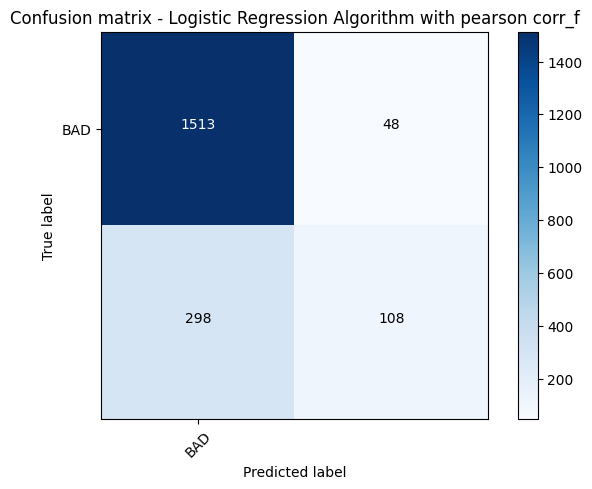

In [87]:
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with pearson corr_f')

plt.show()

In [88]:
dectree = DecisionTreeClassifier(max_depth=100, random_state=0)

In [89]:
dectree.fit(x_tr, y_tr)
y_pre = dectree.predict(x_te)

In [90]:
a4 = accuracy_score(y_te, y_pre)
r4 = recall_score(y_pre, y_te, average="macro")
f4 = f1_score(y_pre, y_te, average="macro")
p4 = precision_score(y_pre, y_te, average="macro")

In [91]:
print("accuracy score : ",a4)
print("f1 score : ",f4)
print("precision score : ",p4)
print("recall score : ",r4)

accuracy score :  0.8515505846466701
f1 score :  0.7700564646047319
precision score :  0.7661423932492435
recall score :  0.7742500365835814


Confusion matrix, without normalization
[[1423  138]
 [ 154  252]]


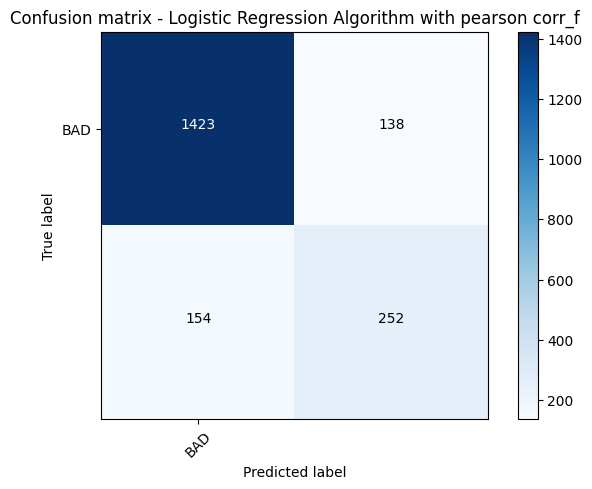

In [92]:
cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with pearson corr_f')

plt.show()

In [93]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
df_new = pd.DataFrame(SelectKBest(chi2, k=10).fit_transform(df.drop(["BAD"],axis = 1),df["BAD"]))

In [94]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9
0,1100.0,25860.0000,39025.000000,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0
1,1300.0,70053.0000,68400.000000,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0
2,1500.0,13500.0000,16700.000000,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0
3,1500.0,73760.8172,101776.048741,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0
4,1700.0,97800.0000,112000.000000,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy score :  0.7935943060498221
f1 score :  0.44246031746031744
precision score :  0.39679715302491103
recall score :  0.5
Confusion matrix, without normalization
[[1561    0]
 [ 406    0]]


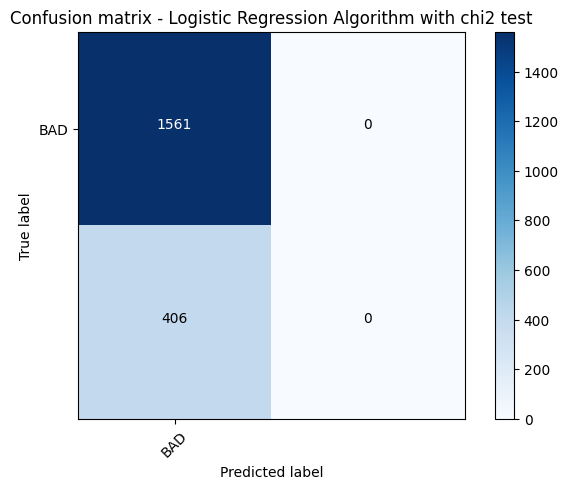

In [95]:
# Running the logistic regression algorithm using the features selected from chi2 test

x = df_new
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
y_pre = logreg.predict(x_te)
a5 = accuracy_score(y_te,y_pre)
f5 = f1_score(y_te, y_pre, average="macro")
p5 = precision_score(y_te, y_pre, average="macro")
r5 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a5)
print("f1 score : ",f5)
print("precision score : ",p5)
print("recall score : ",r5)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
 title='Confusion matrix - Logistic Regression Algorithm with chi2 test')

plt.show()

accuracy score :  0.8617183528215556
f1 score :  0.7862065878983173
precision score :  0.790062358276644
recall score :  0.7825719587355586
Confusion matrix, without normalization
[[1432  129]
 [ 143  263]]


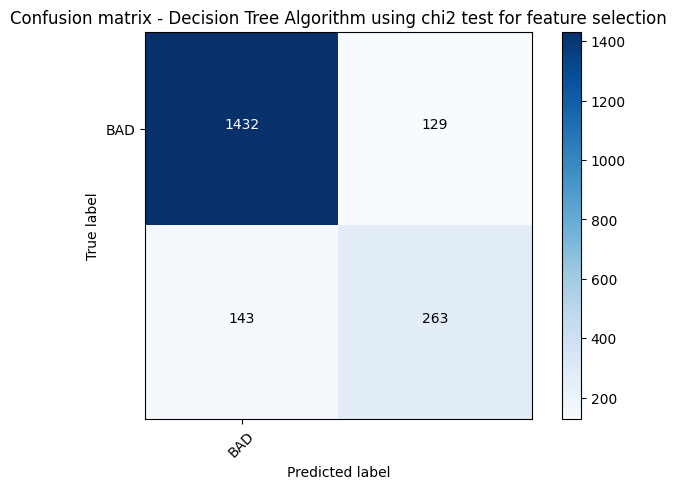

In [96]:
# Decision Tree classifier using features from chi2 test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a6 = accuracy_score(y_te,y_pre)
f6 = f1_score(y_te, y_pre, average="macro")
p6 = precision_score(y_te, y_pre, average="macro")
r6 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a6)
print("f1 score : ",f6)
print("precision score : ",p6)
print("recall score : ",r6)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Decision Tree Algorithm using chi2 test for feature selection')

plt.show()

In [97]:
from sklearn.feature_selection import f_classif

df_new2 = pd.DataFrame(SelectKBest(f_classif, k=10).fit_transform(df.drop(["BAD"],axis=1),df["BAD"]))
df_new2.head()

,0,1,2,3,4,5,6,7,8,9
0,1100.0,2.442347,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0,0.0
1,1300.0,2.079442,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0,0.0
2,1500.0,1.609438,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0,0.0
3,1500.0,2.294782,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0,0.0
4,1700.0,1.386294,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0,1.0


accuracy score :  0.8256227758007118
f1 score :  0.6496716000650101
precision score :  0.7634780439121757
recall score :  0.6249696260133867
Confusion matrix, without normalization
[[1509   52]
 [ 291  115]]


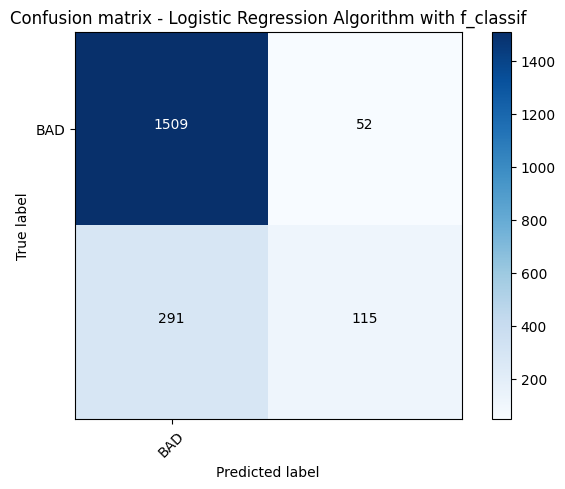

In [98]:
# Running the logistic regression algorithm using the features selected from f_classif test

x = df_new2
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre = logreg.predict(x_te)
a7 = accuracy_score(y_te,y_pre)
f7 = f1_score(y_te, y_pre, average="macro")
p7 = precision_score(y_te, y_pre, average="macro")
r7 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a7)
print("f1 score : ",f7)
print("precision score : ",p7)
print("recall score : ",r7)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
title='Confusion matrix - Logistic Regression Algorithm with f_classif')

plt.show()

accuracy score :  0.8642602948652771
f1 score :  0.7903324131240606
precision score :  0.7939497107901621
recall score :  0.7869071550067375
Confusion matrix, without normalization
[[1434  127]
 [ 140  266]]


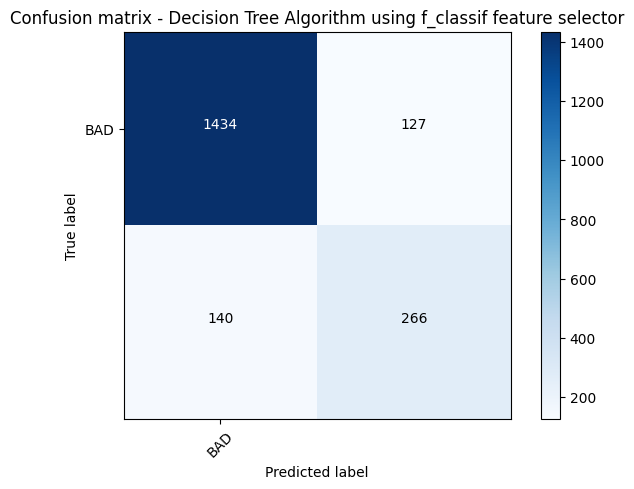

In [99]:
# Decision Tree classifier using features from f_classif test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a8 = accuracy_score(y_te,y_pre)
f8 = f1_score(y_te, y_pre, average="macro")
p8 = precision_score(y_te, y_pre, average="macro")
r8 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a8)
print("f1 score : ",f8)
print("precision score : ",p8)
print("recall score : ",r8)
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Decision Tree Algorithm using f_classif feature selector')

plt.show()

In [100]:
from sklearn.feature_selection import f_regression

df_new3 = pd.DataFrame(SelectKBest(f_regression, k=10).fit_transform(df.drop(["BAD"],axis=1),df["BAD"]))
df_new3.head()

,0,1,2,3,4,5,6,7,8,9
0,1100.0,2.442347,0.0,0.0,94.366667,1.000000,33.779915,0.0,0.0,0.0
1,1300.0,2.079442,0.0,2.0,121.833333,0.000000,33.779915,0.0,1.0,0.0
2,1500.0,1.609438,0.0,0.0,149.466667,1.000000,33.779915,0.0,0.0,0.0
3,1500.0,2.294782,0.0,0.0,179.766275,1.186055,33.779915,0.0,0.0,0.0
4,1700.0,1.386294,0.0,0.0,93.333333,0.000000,33.779915,0.0,0.0,1.0


accuracy score :  0.8256227758007118
f1 score :  0.6496716000650101
precision score :  0.7634780439121757
recall score :  0.6249696260133867
Confusion matrix, without normalization
[[1434  127]
 [ 140  266]]


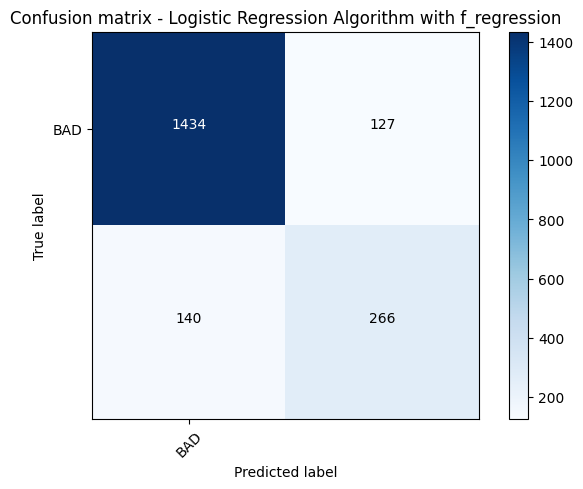

In [101]:
# Running the logistic regression algorithm using the features selected from f_regression test

x = df_new3
y = df["BAD"]
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = .33,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_tr,y_tr)
y_pre2 = logreg.predict(x_te)
a9 = accuracy_score(y_te,y_pre2)
f9 = f1_score(y_te, y_pre2, average="macro")
p9 = precision_score(y_te, y_pre2, average="macro")
r9 = recall_score(y_te, y_pre2, average="macro")
print("accuracy score : ",a9)
print("f1 score : ",f9)
print("precision score : ",p9)
print("recall score : ",r9)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix - Logistic Regression Algorithm with f_regression')

plt.show()

accuracy score :  0.8591764107778342
f1 score :  0.7816638315691613
precision score :  0.7863269375507053
recall score :  0.7773255428659789
Confusion matrix, without normalization
[[1431  130]
 [ 147  259]]


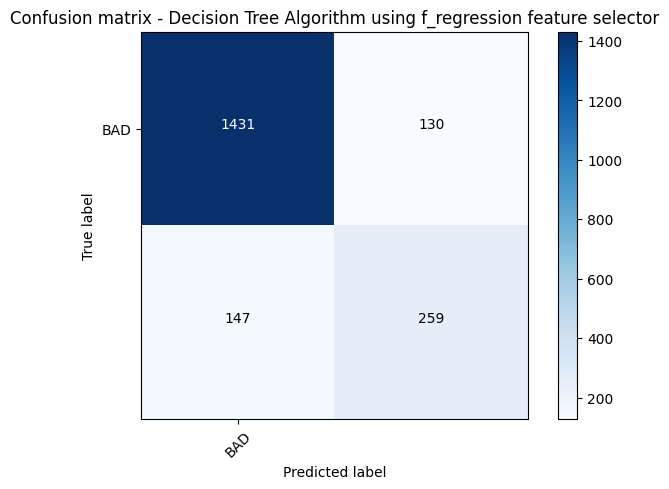

In [102]:
# Decision Tree classifier using features from f_regression test

clf_tree=DecisionTreeClassifier()
clf_tree.max_depth = 100
clf_tree.fit(x_tr,y_tr)
y_pre = clf_tree.predict(x_te)
a10 = accuracy_score(y_te,y_pre)
f10 = f1_score(y_te, y_pre, average="macro")
p10= precision_score(y_te, y_pre, average="macro")
r10 = recall_score(y_te, y_pre, average="macro")
print("accuracy score : ",a10)
print("f1 score : ",f10)
print("precision score : ",p10)
print("recall score : ",r10)

# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_te, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"], 
                      title='Confusion matrix - Decision Tree Algorithm using f_regression feature selector')

plt.show()

Coparing all Models

In [103]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree','Logistic Regression', 'Decision Tree'],
    'Feature Selection Method' : ['None','None','Pearson corr_fact','Pearson corr_fact','chi2 test','chi2 test','f_classif','f_classif','f_regression','f_regression'],
    'Accuracy Score': [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10],
    'Recall Score' : [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10],
    'F1 Score' : [f1,f2,f3,f4,f5,f6,f7,f8,f9,f10],
    'Precision Score' : [p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
})

In [104]:
models

,Model,Feature Selection Method,Accuracy Score,Recall Score,F1 Score,Precision Score
0,Logistic Regression,None,0.793594,0.500000,0.442460,0.396797
1,Decision Tree,None,0.867819,0.777303,0.789252,0.803785
2,Logistic Regression,Pearson corr_fact,0.824098,0.617630,0.640866,0.763879
3,Decision Tree,Pearson corr_fact,0.851551,0.774250,0.770056,0.766142
4,Logistic Regression,chi2 test,0.793594,0.500000,0.442460,0.396797
5,Decision Tree,chi2 test,0.861718,0.782572,0.786207,0.790062
6,Logistic Regression,f_classif,0.825623,0.624970,0.649672,0.763478
7,Decision Tree,f_classif,0.864260,0.786907,0.790332,0.793950
8,Logistic Regression,f_regression,0.825623,0.624970,0.649672,0.763478
9,Decision Tree,f_regression,0.859176,0.777326,0.781664,0.786327


In [105]:
pd.pivot_table(models,index = ["Feature Selection Method","Model"])

Accuracy Score  F1 Score  \
Feature Selection Method Model                                           
None                     Decision Tree              0.867819  0.789252   
                         Logistic Regression        0.793594  0.442460   
Pearson corr_fact        Decision Tree              0.851551  0.770056   
                         Logistic Regression        0.824098  0.640866   
chi2 test                Decision Tree              0.861718  0.786207   
                         Logistic Regression        0.793594  0.442460   
f_classif                Decision Tree              0.864260  0.790332   
                         Logistic Regression        0.825623  0.649672   
f_regression             Decision Tree              0.859176  0.781664   
                         Logistic Regression        0.825623  0.649672   

                                              Precision Score  Recall Score  
Feature Selection Method Model                                               
None                     Decision Tree               0.803785      0.777303  
                         Logistic Regression         0.396797      0.500000  
Pearson corr_fact        Decision Tree               0.766142      0.774250  
                         Logistic Regression         0.763879      0.617630  
chi2 test                Decision Tree               0.790062      0.782572  
                         Logistic Regression         0.396797      0.500000  
f_classif                Decision Tree               0.793950      0.786907  
                         Logistic Regression         0.763478      0.624970  
f_regression             Decision Tree               0.786327      0.777326  
                         Logistic Regression         0.763478      0.624970